In [27]:
%plot --format svg

In [28]:
setdefaults

## My question from last class 

![q1](det_L.png)

![q2](chol_pre.png)


## Your questions from last class

1. Will the exam be more theoretical or problem based?

2. Writing code is difficult 

3. What format can we expect for the midterm? 

2. Could we go over some example questions for the exam?

3. Will the use of GitHub be tested on the Midterm exam? Or is it more focused on linear algebra techniques/what was covered in the lectures?

4. This is not my strong suit, getting a bit overwhelmed with matrix multiplication.

5. I forgot how much I learned in linear algebra.

6. What's the most exciting project you've ever worked on with Matlab/Octave?

# Matrix Inverse and Condition


Considering the same solution set:

$y=Ax$

If we know that $A^{-1}A=I$, then 

$A^{-1}y=A^{-1}Ax=x$

so 

$x=A^{-1}y$

Where, $A^{-1}$ is the inverse of matrix $A$.

$2x_{1}+x_{2}=1$

$x_{1}+3x_{2}=1$

$Ax=y$

$\left[ \begin{array}{cc}
2 & 1 \\
1 & 3 \end{array} \right]
\left[\begin{array}{c} 
x_{1} \\ 
x_{2} \end{array}\right]=
\left[\begin{array}{c} 
1 \\
1\end{array}\right]$

$A^{-1}=\frac{1}{2*3-1*1}\left[ \begin{array}{cc}
3 & 1 \\
-1 & 2 \end{array} \right]=
\left[ \begin{array}{cc}
3/5 & -1/5 \\
-1/5 & 2/5 \end{array} \right]$


In [2]:
A=[2,1;1,3]
invA=1/5*[3,-1;-1,2]

A*invA
invA*A

A =

   2   1
   1   3

invA =

   0.60000  -0.20000
  -0.20000   0.40000

ans =

   1.00000   0.00000
   0.00000   1.00000

ans =

   1.00000   0.00000
   0.00000   1.00000



How did we know the inverse of A? 

for 2$\times$2 matrices, it is always:

$A=\left[ \begin{array}{cc}
A_{11} & A_{12} \\
A_{21} & A_{22} \end{array} \right]$

$A^{-1}=\frac{1}{det(A)}\left[ \begin{array}{cc}
A_{22} & -A_{12} \\
-A_{21} & A_{11} \end{array} \right]$

$AA^{-1}=\frac{1}{A_{11}A_{22}-A_{21}A_{12}}\left[ \begin{array}{cc}
A_{11}A_{22}-A_{21}A_{12} & -A_{11}A_{12}+A_{12}A_{11} \\
A_{21}A_{22}-A_{22}A_{21} & -A_{21}A_{12}+A_{22}A_{11} \end{array} \right]
=\left[ \begin{array}{cc}
1 & 0 \\
0 & 1 \end{array} \right]$

What about bigger matrices?

We can use the LU-decomposition

$A=LU$

$A^{-1}=(LU)^{-1}=U^{-1}L^{-1}$

if we divide $A^{-1}$ into n-column vectors, $a_{n}$, then

$Aa_{1}=\left[\begin{array}{c} 
1 \\ 
0 \\ 
\vdots \\
0 \end{array} \right]$
$Aa_{2}=\left[\begin{array}{c} 
0 \\ 
1 \\ 
\vdots \\
0 \end{array} \right]$
$Aa_{n}=\left[\begin{array}{c} 
0 \\ 
0 \\ 
\vdots \\
1 \end{array} \right]$


Which we can solve for each $a_{n}$ with LU-decomposition, knowing the lower and upper triangular decompositions, then 

$A^{-1}=\left[ \begin{array}{cccc}
| & | &  & | \\
a_{1} & a_{2} & \cdots & a_{3} \\
| & | &  & | \end{array} \right]$


$Ld_{1}=\left[\begin{array}{c} 
1 \\ 
0 \\ 
\vdots \\
0 \end{array} \right]$
$;~Ua_{1}=d_{1}$

$Ld_{2}=\left[\begin{array}{c} 
0 \\ 
1 \\ 
\vdots \\
0 \end{array} \right]$
$;~Ua_{2}=d_{2}$

$Ld_{n}=\left[\begin{array}{c} 
0 \\ 
1 \\ 
\vdots \\
n \end{array} \right]$
$;~Ua_{n}=d_{n}$

Consider the following matrix:

$A=\left[ \begin{array}{ccc}
2 & -1 & 0\\
-1 & 2 & -1\\
0 & -1 & 1 \end{array} \right]$


In [21]:
A=[2,-1,0;-1,2,-1;0,-1,1]
U=A;
L=eye(3,3);
U(2,:)=U(2,:)-U(2,1)/U(1,1)*U(1,:)
L(2,1)=A(2,1)/A(1,1)

A =

   2  -1   0
  -1   2  -1
   0  -1   1

U =

   2.00000  -1.00000   0.00000
   0.00000   1.50000  -1.00000
   0.00000  -1.00000   1.00000

L =

   1.00000   0.00000   0.00000
  -0.50000   1.00000   0.00000
   0.00000   0.00000   1.00000



In [22]:
L(3,2)=U(3,2)/U(2,2)
U(3,:)=U(3,:)-U(3,2)/U(2,2)*U(2,:)


L =

   1.00000   0.00000   0.00000
  -0.50000   1.00000   0.00000
   0.00000  -0.66667   1.00000

U =

   2.00000  -1.00000   0.00000
   0.00000   1.50000  -1.00000
   0.00000   0.00000   0.33333



Now solve for $d_1$ then $a_1$, $d_2$ then $a_2$, and $d_3$ then $a_{3}$

$Ld_{1}=\left[\begin{array}{c} 
1 \\ 
0 \\ 
\vdots \\
0 \end{array} \right]$
$;~Ua_{1}=d_{1}$

In [29]:
d1=zeros(3,1);
d1(1)=1;
d1(2)=0-L(2,1)*d1(1);
d1(3)=0-L(3,1)*d1(1)-L(3,2)*d1(2)

d1 =

   1.00000
   0.50000
   0.33333



In [30]:
a1=zeros(3,1);
a1(3)=d1(3)/U(3,3);
a1(2)=1/U(2,2)*(d1(2)-U(2,3)*a1(3));
a1(1)=1/U(1,1)*(d1(1)-U(1,2)*a1(2)-U(1,3)*a1(3))

a1 =

   1.00000
   1.00000
   1.00000



In [28]:
d2=zeros(3,1);
d2(1)=0;
d2(2)=1-L(2,1)*d2(1);
d2(3)=0-L(3,1)*d2(1)-L(3,2)*d2(2)

d2 =

   0.00000
   1.00000
   0.66667



In [31]:
a2=zeros(3,1);
a2(3)=d2(3)/U(3,3);
a2(2)=1/U(2,2)*(d2(2)-U(2,3)*a2(3));
a2(1)=1/U(1,1)*(d2(1)-U(1,2)*a2(2)-U(1,3)*a2(3))

a2 =

   1.0000
   2.0000
   2.0000



In [37]:
d3=zeros(3,1);
d3(1)=0;
d3(2)=0-L(2,1)*d3(1);
d3(3)=1-L(3,1)*d3(1)-L(3,2)*d3(2)

d3 =

   0
   0
   1



In [38]:
a3=zeros(3,1);
a3(3)=d3(3)/U(3,3);
a3(2)=1/U(2,2)*(d3(2)-U(2,3)*a3(3));
a3(1)=1/U(1,1)*(d3(1)-U(1,2)*a3(2)-U(1,3)*a3(3))

a3 =

   1.00000
   2.00000
   3.00000



Final solution for $A^{-1}$ is $[a_{1}~a_{2}~a_{3}]$

In [40]:
invA=[a1,a2,a3]
A*invA

invA =

   1.00000   1.00000   1.00000
   1.00000   2.00000   2.00000
   1.00000   2.00000   3.00000

ans =

   1.00000   0.00000   0.00000
   0.00000   1.00000  -0.00000
  -0.00000  -0.00000   1.00000



Now the solution of $x$ to $Ax=y$ is $x=A^{-1}y$

In [44]:
y=[1;2;3]
x=invA*y
xbs=A\y
x-xbs
eps

y =

   1
   2
   3

x =

    6.0000
   11.0000
   14.0000

xbs =

    6.0000
   11.0000
   14.0000

ans =

  -3.5527e-15
  -8.8818e-15
  -1.0658e-14

ans =    2.2204e-16


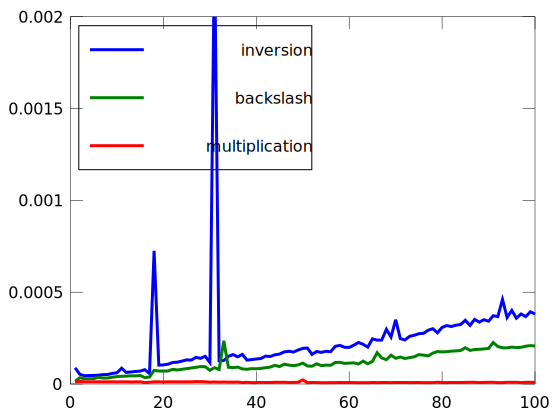

In [61]:
N=100;
n=[1:N];
t_inv=zeros(N,1);
t_bs=zeros(N,1);
t_mult=zeros(N,1);
for i=1:N
    A=rand(i,i);
    tic
    invA=inv(A);
    t_inv(i)=toc;
    b=rand(i,1);
    tic;
    x=A\b;
    t_bs(i)=toc;
    tic;
    x=invA*b;
    t_mult(i)=toc;
end
plot(n,t_inv,n,t_bs,n,t_mult)
axis([0 100 0 0.002])
legend('inversion','backslash','multiplication','Location','NorthWest')

## Condition of a matrix 
### *just checked in to see what condition my condition was in*
### Matrix norms

The Euclidean norm of a vector is measure of the magnitude (in 3D this would be: $|x|=\sqrt{x_{1}^{2}+x_{2}^{2}+x_{3}^{2}}$) in general the equation is:

$||x||_{e}=\sqrt{\sum_{i=1}^{n}x_{i}^{2}}$

For a matrix, A, the same norm is called the Frobenius norm:

$||A||_{f}=\sqrt{\sum_{i=1}^{n}\sum_{i=1}^{m}A_{i,j}^{2}}$

In general we can calculate any $p$-norm where

$||A||_{p}=\sqrt{\sum_{i=1}^{n}\sum_{i=1}^{m}A_{i,j}^{p}}$

so the p=1, 1-norm is 

$||A||_{1}=\sqrt{\sum_{i=1}^{n}\sum_{i=1}^{m}A_{i,j}^{1}}=\sum_{i=1}^{n}\sum_{i=1}^{m}|A_{i,j}|$

$||A||_{\infty}=\sqrt{\sum_{i=1}^{n}\sum_{i=1}^{m}A_{i,j}^{\infty}}=\max_{1\le i \le n}\sum_{j=1}^{m}|A_{i,j}|$

### Condition of Matrix

The matrix condition is the product of 

$Cond(A) = ||A||\cdot||A^{-1}||$ 

So each norm will have a different condition number, but the limit is $Cond(A)\ge 1$

An estimate of the rounding error is based on the condition of A:

$\frac{||\Delta x||}{x} \le Cond(A) \frac{||\Delta A||}{||A||}$

So if the coefficients of A have accuracy to $10^{-t}

and the condition of A, $Cond(A)=10^{c}$

then the solution for x can have rounding errors up to $10^{c-t}$


In [1]:
A=[1,1/2,1/3;1/2,1/3,1/4;1/3,1/4,1/5]
[L,U]=LU_naive(A)

A =

   1.00000   0.50000   0.33333
   0.50000   0.33333   0.25000
   0.33333   0.25000   0.20000

L =

   1.00000   0.00000   0.00000
   0.50000   1.00000   0.00000
   0.33333   1.00000   1.00000

U =

   1.00000   0.50000   0.33333
   0.00000   0.08333   0.08333
   0.00000  -0.00000   0.00556



Then, $A^{-1}=(LU)^{-1}=U^{-1}L^{-1}$

$Ld_{1}=\left[\begin{array}{c}
1 \\
0 \\
0 \end{array}\right]$, $Ux_{1}=d_{1}$ ...

In [12]:
invA=zeros(3,3);
d1=L\[1;0;0];
d2=L\[0;1;0];
d3=L\[0;0;1];
invA(:,1)=U\d1;
invA(:,2)=U\d2;
invA(:,3)=U\d3
invA*A

invA =

     9.0000   -36.0000    30.0000
   -36.0000   192.0000  -180.0000
    30.0000  -180.0000   180.0000

ans =

   1.0000e+00   3.5527e-15   2.9976e-15
  -1.3249e-14   1.0000e+00  -9.1038e-15
   8.5117e-15   7.1054e-15   1.0000e+00



Find the condition of A, $cond(A)$

In [11]:
% Frobenius norm
normf_A = sqrt(sum(sum(A.^2)))
normf_invA = sqrt(sum(sum(invA.^2)))

cond_f_A = normf_A*normf_invA

norm(A,'fro')

% p=1, column sum norm
norm1_A = max(sum(A,2))
norm1_invA = max(sum(invA,2))
norm(A,1)

cond_1_A=norm1_A*norm1_invA

% p=inf, row sum norm
norminf_A = max(sum(A,1))
norminf_invA = max(sum(invA,1))
norm(A,inf)

cond_inf_A=norminf_A*norminf_invA


normf_A =  1.4136
normf_invA =  372.21
cond_f_A =  526.16
ans =  1.4136
norm1_A =  1.8333
norm1_invA =  30.000
ans =  1.8333
cond_1_A =  55.000
norminf_A =  1.8333
norminf_invA =  30.000
ans =  1.8333
cond_inf_A =  55.000


Consider the problem again from the intro to Linear Algebra, 4 masses are connected in series to 4 springs with spring constants $K_{i}$. What does a high condition number mean for this problem? 

![Springs-masses](../lecture_09/mass_springs.png)

The masses haves the following amounts, 1, 2, 3, and 4 kg for masses 1-4. Using a FBD for each mass:

$m_{1}g+k_{2}(x_{2}-x_{1})-k_{1}x_{1}=0$

$m_{2}g+k_{3}(x_{3}-x_{2})-k_{2}(x_{2}-x_{1})=0$

$m_{3}g+k_{4}(x_{4}-x_{3})-k_{3}(x_{3}-x_{2})=0$

$m_{4}g-k_{4}(x_{4}-x_{3})=0$

in matrix form:

$\left[ \begin{array}{cccc}
k_{1}+k_{2} & -k_{2} & 0 & 0 \\
-k_{2} & k_{2}+k_{3} & -k_{3} & 0 \\
0 & -k_{3} & k_{3}+k_{4} & -k_{4} \\
0 & 0 & -k_{4} & k_{4} \end{array} \right]
\left[ \begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \end{array} \right]=
\left[ \begin{array}{c}
m_{1}g \\
m_{2}g \\
m_{3}g \\
m_{4}g \end{array} \right]$

In [21]:
k1=10; % N/m
k2=100000;
k3=10;
k4=1;
m1=1; % kg
m2=2;
m3=3;
m4=4;
g=9.81; % m/s^2
K=[k1+k2 -k2 0 0; -k2 k2+k3 -k3 0; 0 -k3 k3+k4 -k4; 0 0 -k4 k4]
y=[m1*g;m2*g;m3*g;m4*g]

K =

   100010  -100000        0        0
  -100000   100010      -10        0
        0      -10       11       -1
        0        0       -1        1

y =

    9.8100
   19.6200
   29.4300
   39.2400



In [25]:
cond(K,inf)
cond(K,1)
cond(K,'fro')
cond(K,2)

ans =    3.2004e+05
ans =    3.2004e+05
ans =    2.5925e+05
ans =    2.5293e+05


In [26]:
e=eig(K)
max(e)/min(e)

e =

   7.9078e-01
   3.5881e+00
   1.7621e+01
   2.0001e+05

ans =    2.5293e+05
